## Read details from this https://medium.com/better-programming/barcode-image-segmentation-a36cdce69f03
## Import all Libraries

In [32]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [33]:
old_nid_back = 'images/media/0a041a8f0928442eb75e0ca1619e250a_back.jpg'
new_nid_back = 'images/media/0b35bf8655844d1eaa2b303cc1dec86e_back.jpg'

## Show the Old NID

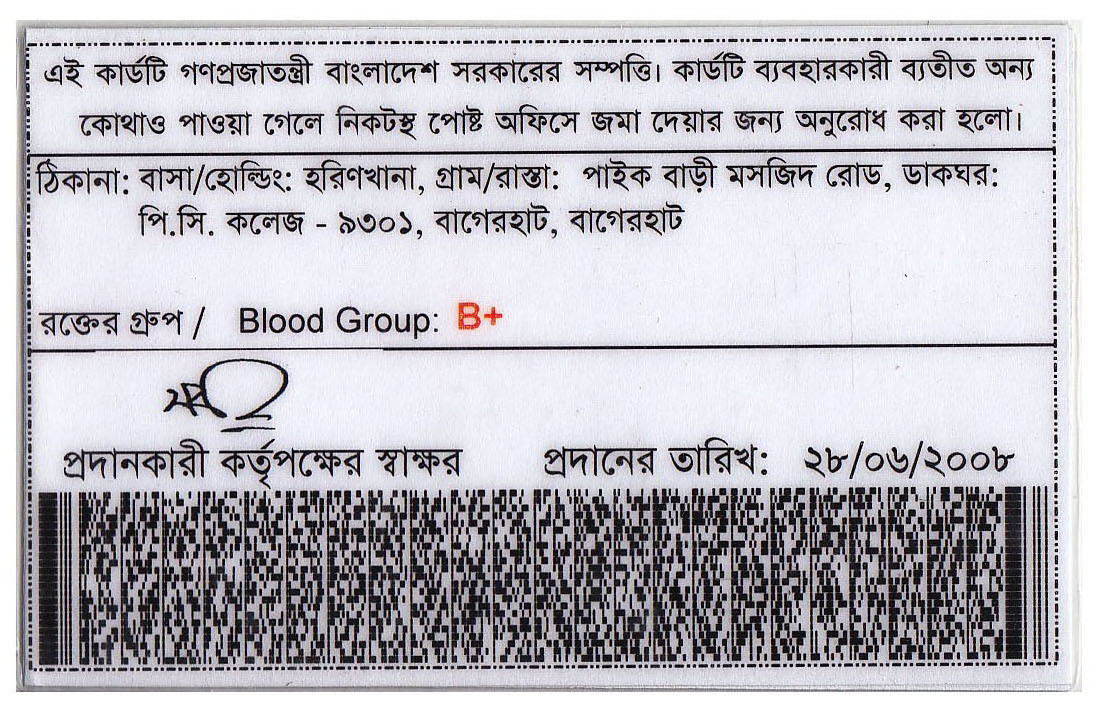

In [34]:
Image.open(old_nid_back)

## Show the New NID

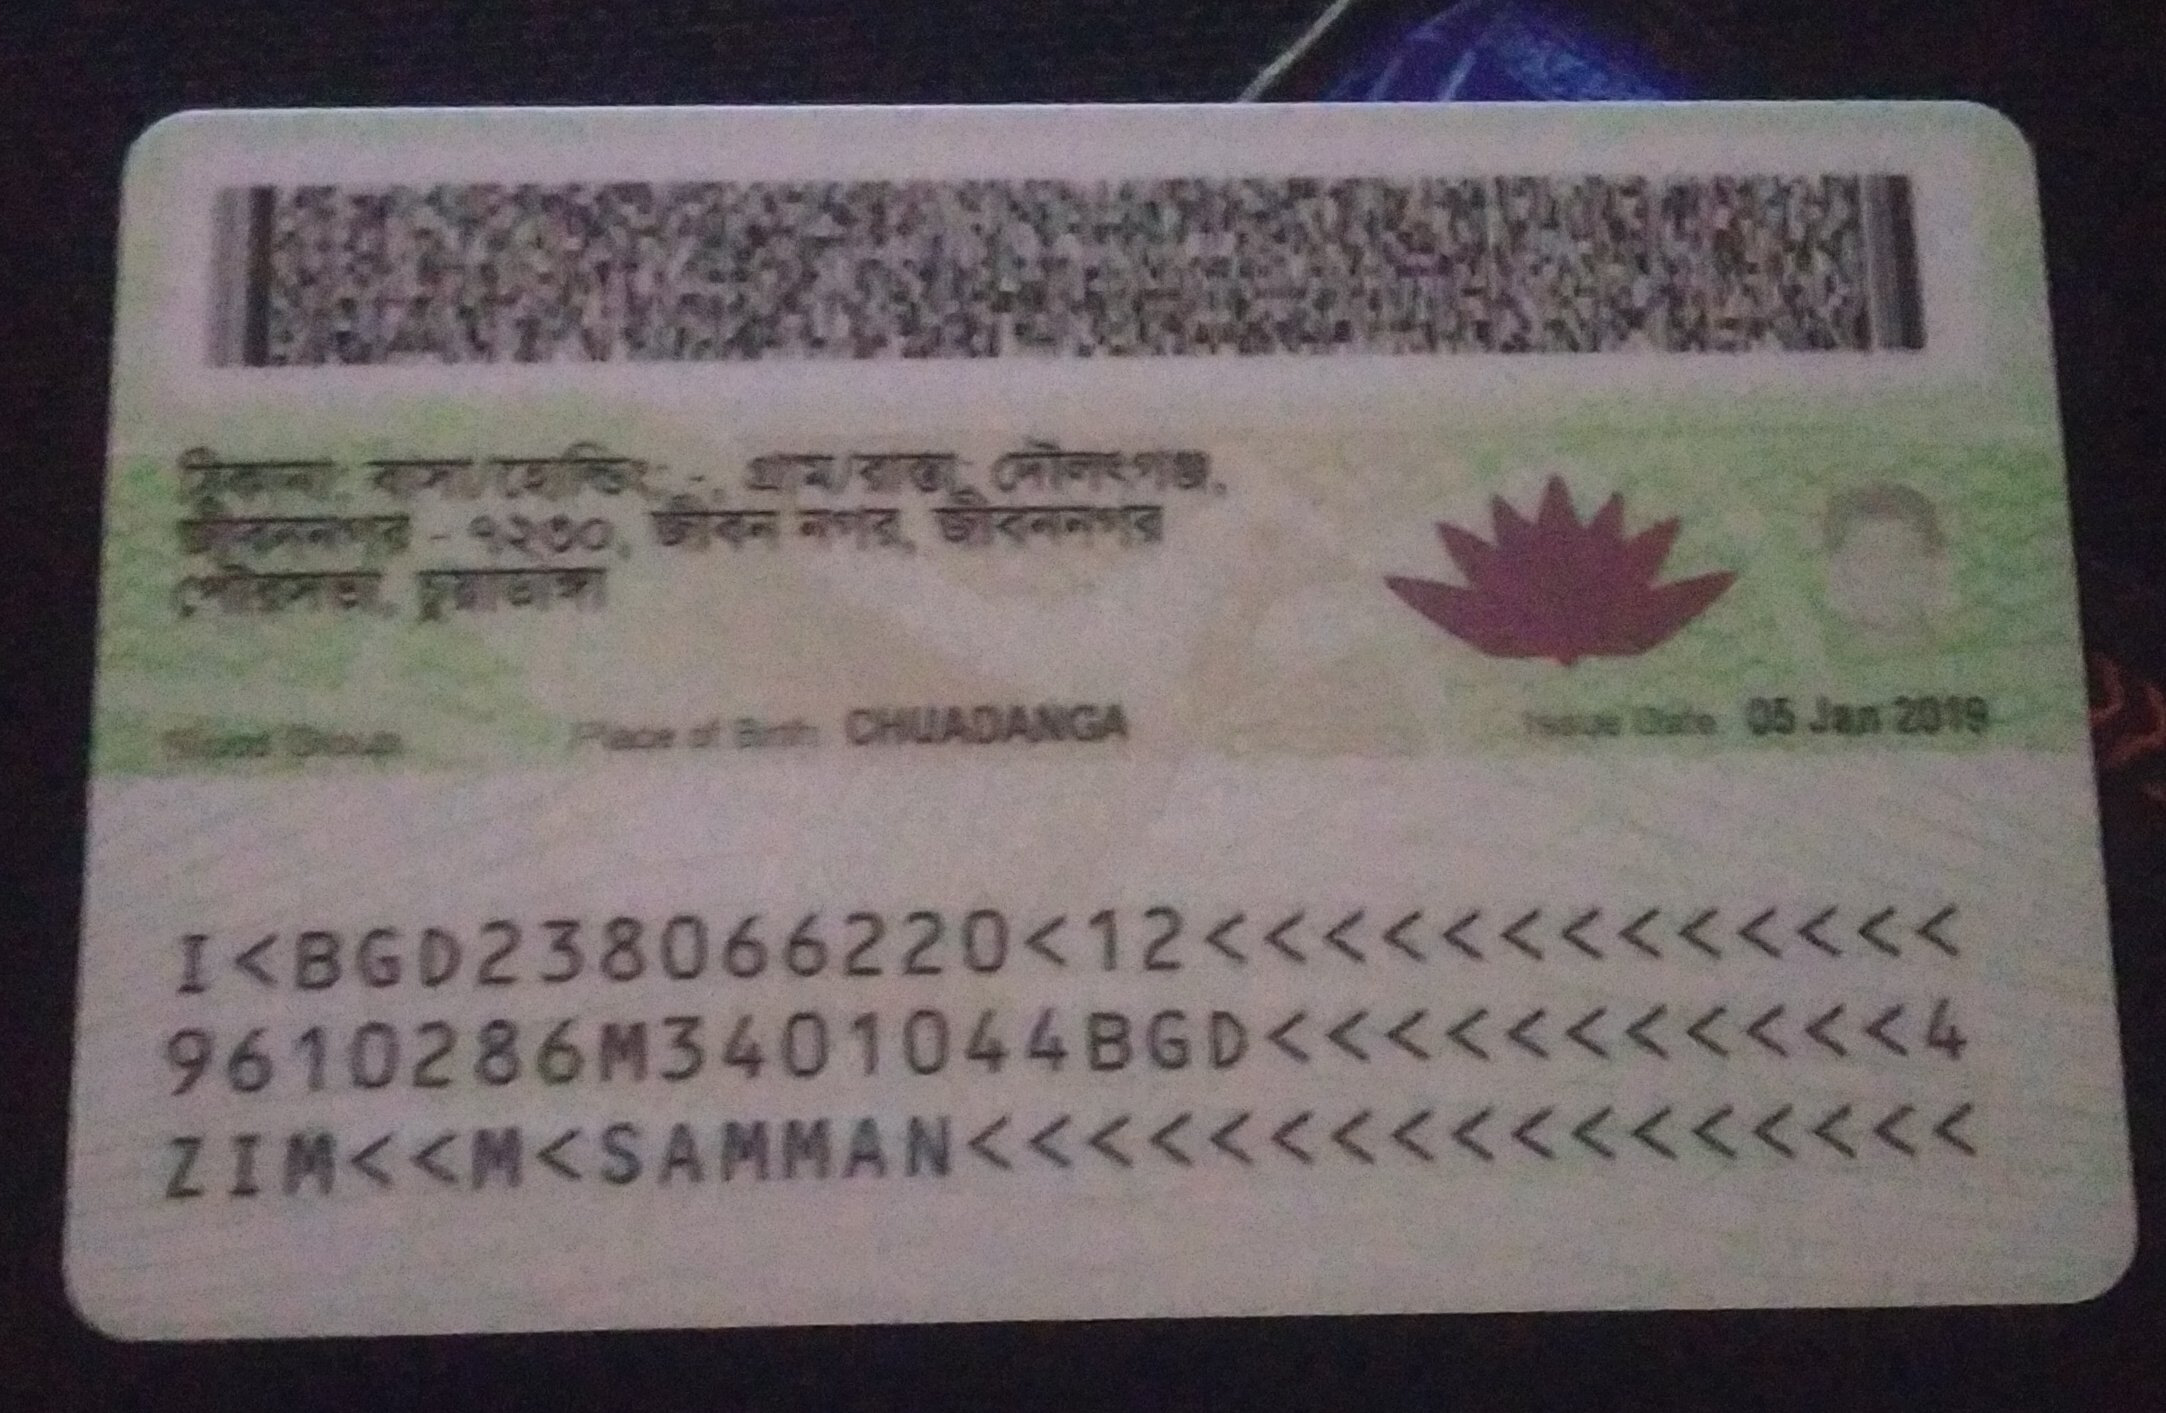

In [35]:
Image.open(new_nid_back)

In [37]:
def read_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

## Step 1: Binarize the image
**Black Hat + Thresholding**

In [38]:
def binarize(image_path):
    image = read_image(image_path)
    scale = 800.0 / image.shape[1]
    image = cv2.resize(image, (int(image.shape[1] * scale), int(image.shape[0] * scale)))
    
    # Blackhat
    kernel = np.ones((1, 3), np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel, anchor=(1, 0))

    # Thresholding
    thresh, image = cv2.threshold(image, 10, 255, cv2.THRESH_BINARY)
    return scale, thresh, image

In [39]:
def preprocess(image_path):
    scale, thresh, image = binarize(image_path)
    kernel = np.ones((21, 35), np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=1)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    return scale, image

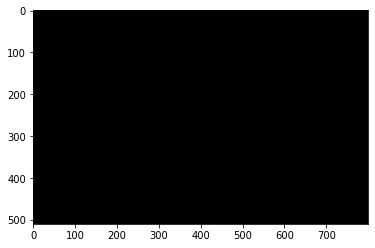

In [40]:
image = preprocess(old_nid_back)

In [41]:
print(scale)

None


In [44]:
def find_contours(image_path):
    original_image = cv2.imread(image_path)
    scale, image = preprocess(image_path)
    contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    unscale = 1.0 / scale
    if contours != None:
        for contour in contours:
            if cv2.contourArea(contour) <= 2000:
                continue
            rect = cv2.minAreaRect(contour)
            rect = ((int(rect[0][0] * unscale), int(rect[0][1] * unscale)), (int(rect[1][0] * unscale), int(rect[1][1] * unscale)), rect[2])
            box = np.int0(cv2.cv.BoxPoints(rect))
            cv2.drawContours(original_image, [box], 0, (0, 255, 0), thickness = 2)
    return original_image

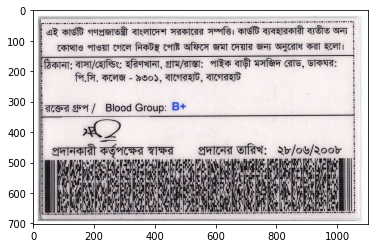

In [45]:
image = find_contours(old_nid_back)
plt.imshow(image)